<a href="https://colab.research.google.com/github/sivaswaroop/Innobyte/blob/main/Innobyte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Step 1: Import necessary libraries and load the dataset***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Amazon Sale Report.csv')

***Step 2: Explore the dataset and understand the structure***

In [2]:
# Get the first few rows of the dataset
print(df.head())

# Get the column names and data types
print(df.columns)
print(df.dtypes)

# Get the summary statistics of the dataset
print(df.describe())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

***Step 3: Sales Overview - Analyze the overall sales performance***

Total Sales: $78,590,170.25
Average Sales per Order: $648.56


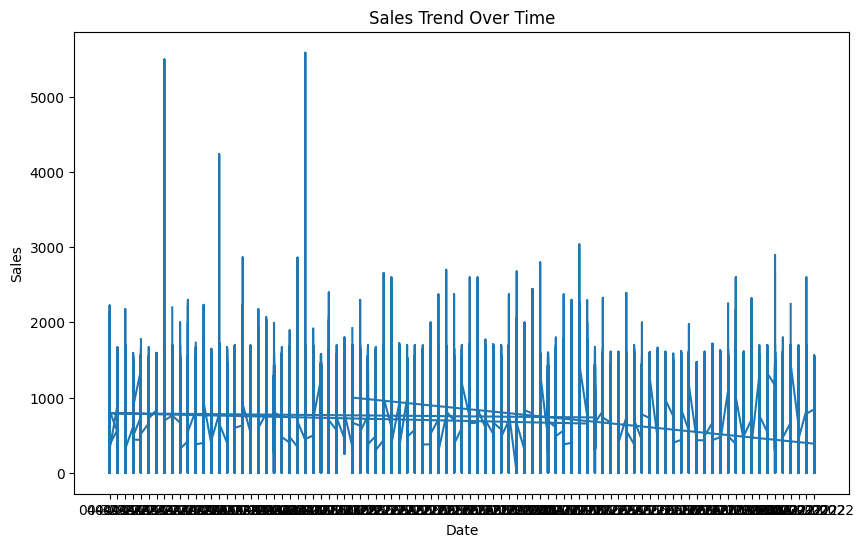

In [15]:
# Calculate the total sales
total_sales = df['Amount'].sum()
print(f'Total Sales: ${total_sales:,.2f}')

# Calculate the average sales per order
avg_sales_per_order = df['Amount'].mean()
print(f'Average Sales per Order: ${avg_sales_per_order:,.2f}')

# Plot the sales trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Amount'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend Over Time')
plt.show()

***Step 4: Product Analysis - Analyze the distribution of product categories, sizes, and quantities sold***

Category
T-shirt     39206756.65
Shirt       21297770.08
Blazzer     11215104.12
Trousers     5346286.30
Perfume       789419.66
Name: Amount, dtype: float64
Size
M      13692642.13
L      13039824.03
XL     12255950.38
XXL    10464977.69
S      10427760.94
Name: Amount, dtype: float64


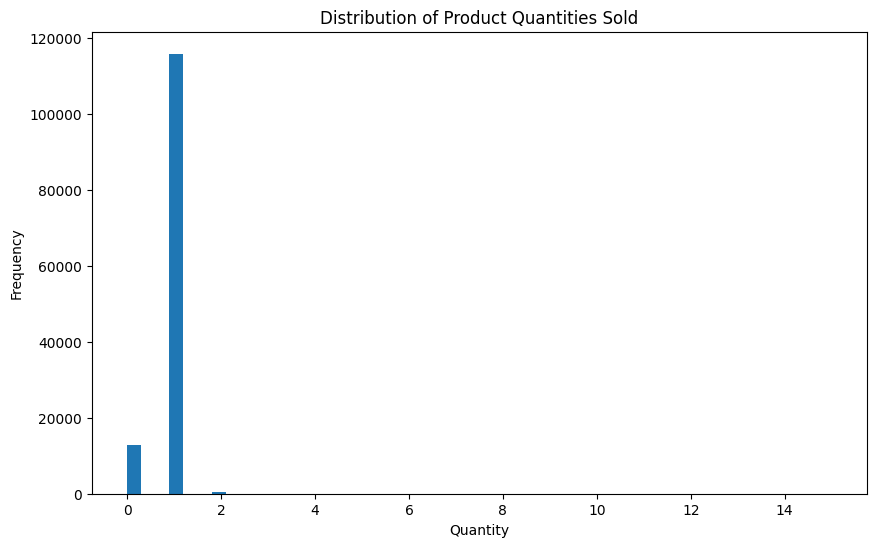

In [14]:
# Get the top 5 product categories by sales
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)
print(top_categories)

# Get the top 5 product sizes by sales
top_sizes = df.groupby('Size')['Amount'].sum().sort_values(ascending=False).head(5)
print(top_sizes)

# Plot the distribution of product quantities sold
plt.figure(figsize=(10, 6))
plt.hist(df['Qty'], bins=50)
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Product Quantities Sold')
plt.show()

***Step 5: Fulfillment Analysis - Investigate the fulfillment methods used and their effectiveness***

['Merchant' 'Amazon']
Fulfilment
Amazon      464193.218417
Merchant    463380.017350
Name: ship-postal-code, dtype: float64


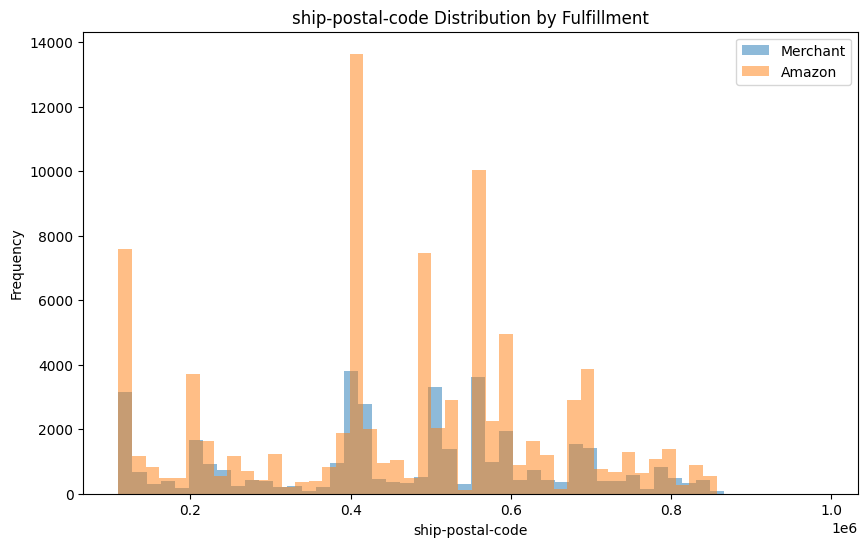

In [25]:
# Get the fulfillment methods used
fulfillment_methods = df['Fulfilment'].unique()
print(fulfillment_methods)

# Calculate the average shipping time for each fulfillment method
avg_shipping_time = df.groupby('Fulfilment')['ship-postal-code'].mean()
print(avg_shipping_time)

# Plot the shipping time distribution for each fulfillment method
plt.figure(figsize=(10, 6))
for method in fulfillment_methods:
    plt.hist(df[df['Fulfilment'] == method]['ship-postal-code'], bins=50, alpha=0.5, label=method)
plt.xlabel('ship-postal-code')
plt.ylabel('Frequency')
plt.title('ship-postal-code Distribution by Fulfillment')
plt.legend()
plt.show()

***Step 6: Customer Segmentation - Segment customers based on their buying behavior, location, and other relevant factors***

ship-city
BENGALURU    6845390.65
HYDERABAD    4946394.25
MUMBAI       3701843.04
NEW DELHI    3612512.78
CHENNAI      3103415.74
Name: Amount, dtype: float64


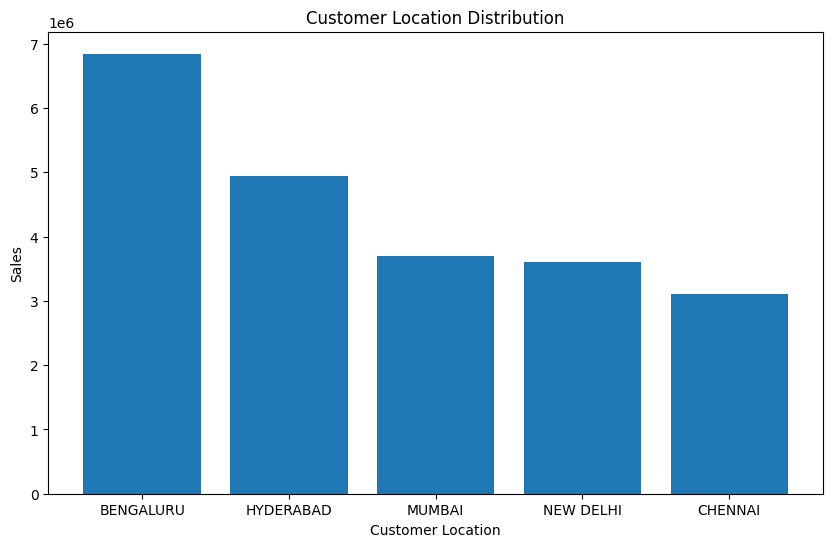

In [30]:
# Get the top 5 customer locations by sales
top_locations = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(5)
print(top_locations)

# Plot the customer location distribution
plt.figure(figsize=(10, 6))
plt.bar(top_locations.index, top_locations.values)
plt.xlabel('Customer Location')
plt.ylabel('Sales')
plt.title('Customer Location Distribution')
plt.show()

***Step 7: Geographical Analysis - Explore the geographical distribution of sales***

ship-state
MAHARASHTRA      13340333.05
KARNATAKA        10480694.22
TELANGANA         6915018.08
UTTAR PRADESH     6823947.08
TAMIL NADU        6519182.30
Name: Amount, dtype: float64


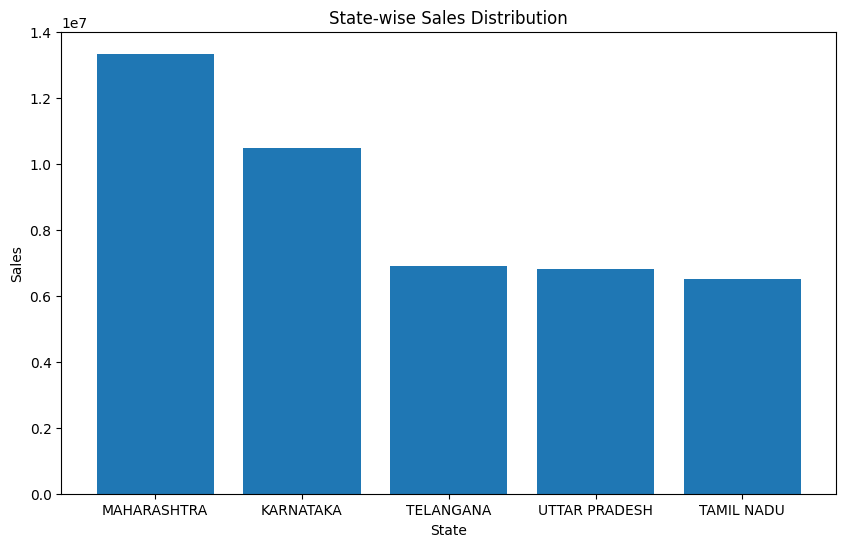

In [31]:
# Get the top 5 states by sales
top_states = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(5)
print(top_states)

# Plot the state-wise sales distribution
plt.figure(figsize=(10, 6))
plt.bar(top_states.index, top_states.values)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('State-wise Sales Distribution')
plt.show()